# Constructing and Evaluating a Value-Weighted Telehealth Index

## Table of Contents
1. Introduction
2. Install and Import Packages
3. Access Data Using Yahoo Finance API
4. Construct Dataframe for Components
5. Evaluate Component Performance
6. Construct Telehealth Index (Value-Weighted)
7. Benchmark Telehealth Index Against S&P500
8. Index Correlations
9. Export to Excel
10. Future Areas for Analysis

## 1. Introduction

Telehealth - remote care delivery, patient monitoring, and education / engagement via a broad range of digital technologies such as wearables and remote monitoring devices, live video conferencing, image store and forward systems, and health apps - has long been a growing healthcare modality. COVID-19 has dramatically accelerated its adoption among patients and caregivers, along with supporting regulatory, reimbursement and billing, and data and privacy structures. 

Today, we'll explore the potential of investing in telehealth equities by constructing and evaluating a value(cap)-weighted telehealth index. 

**Business Question**: are telehealth equities worth exploring as a high-return investment based on historical performance?
<br>**Data Question**: what is the performance of key telehealth stocks and a constructed telehealth index vs. the S&P500 over the past 5 years? (includes normalized returns, rolling returns, mean, std, distribution / spread)
<br>**Data Need**: daily close price and volume for select telehealth stocks and S&P500 for the past five years via the Yahoo Finance API (https://pypi.org/project/yfinance/)

We'll focus on the following public companies that are or are expected to be leading in the space:

Teladoc Health (TDOC) - https://www.teladoc.com/
<br>Livongo Health (LVGO) (IPO'd July 25, 2019) - https://www2.livongo.com/
<br>One Medical (ONEM) (IPO'd January 30, 2020) - https://www.onemedical.com/
<br>Zoom (ZM) (IPO'd April 18, 2019)- https://zoom.us/ 
<br>Humana (HUM) - http://www.humana.com/
<br>Anthem (ANTM) - https://www.anthem.com/
<br>CVS Health (CVS) - https://cvshealth.com/
<br>iRobot (IRBT) - https://www.irobot.com/
<br>Castlight Health - https://www.castlighthealth.com/

Our analysis could be useful or any individual or institutional investor exploring telehealth as an investment opportunity. Over the 5-year period from August 26, 2015 to August 26, 2020, our telehealth index below generated a return of 235%, roughly 3x that of the S&P500's 79% return. 

Our focus is limited to historical stock performance. Future areas for analysis include valuation based on underlying fundamentals (e.g., earnings, cash flow), managmenent, technology, and business model assessment, market value ratios, and portfolio risk. Additionally, since the index's day-to-day volatility and index correlations would be hard to stomach for most casual investors, it would be good to diversify the index with additional pure-play, diversified medical technology / device (e.g., Medtronic), insurance and payments, healthcare cloud / information systems, and big tech (e.g., Apple) companies.   

## 2. Install and Import Packages

In [128]:
!pip install yfinance
!pip install pandas-datareader

In [129]:
# Import yfinance to make Yahoo Finance API call 
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Import data reader to directly convert Yahoo Finance data into dataframe
from pandas_datareader import data as pdr

## 3. Access Data Using Yahoo Finance API

We'll pull data for the 5-year period from August 26, 2015 to August 26, 2020. 

In [130]:
# Teladoc data from Yahoo Finance as dataframe
teladoc = pdr.get_data_yahoo("TDOC", start="2015-08-26", end="2020-08-26")

# Check first 3 and last 3 rows
pd.concat([teladoc.head(3), teladoc.tail(3)])

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-26,25.629999,22.750000,24.719999,25.280001,1479900,25.280001
2015-08-27,28.500000,25.740000,27.660000,26.129999,1596800,26.129999
2015-08-28,27.790001,25.910000,26.280001,27.719999,662400,27.719999
2020-08-24,225.910004,206.860001,224.949997,210.630005,5660600,210.630005
2020-08-25,215.085007,206.000000,209.740005,212.009995,3268500,212.009995
2020-08-26,214.889999,207.636002,210.809998,214.570007,3771500,214.570007


In [131]:
# Check info - we have a datetime index
teladoc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-08-26 to 2020-08-26
Data columns (total 6 columns):
High         1260 non-null float64
Low          1260 non-null float64
Open         1260 non-null float64
Close        1260 non-null float64
Volume       1260 non-null int64
Adj Close    1260 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [132]:
# Livongo data from Yahoo Finance as dataframe
livongo = pdr.get_data_yahoo("LVGO", start="2015-08-26", end="2020-08-26")

In [133]:
# Livongo data from Yahoo Finance as dataframe
onemedical = pdr.get_data_yahoo("ONEM", start="2015-08-26", end="2020-08-26")

In [134]:
# Zoom data from Yahoo Finance as dataframe
zoom = pdr.get_data_yahoo("ZM", start="2015-08-26", end="2020-08-26")

In [135]:
# Humana data from Yahoo Finance as dataframe
humana = pdr.get_data_yahoo("HUM", start="2015-08-26", end="2020-08-26")

In [136]:
# Anthem data from Yahoo Finance as dataframe
anthem = pdr.get_data_yahoo("ANTM", start="2015-08-26", end="2020-08-26")

In [137]:
# CVS data from Yahoo Finance as dataframe
cvs = pdr.get_data_yahoo("CVS", start="2015-08-26", end="2020-08-26")

In [138]:
# iRobot data from Yahoo Finance as dataframe
irobot = pdr.get_data_yahoo("IRBT", start="2015-08-26", end="2020-08-26")

In [139]:
# Castlight Health data from Yahoo Finance as dataframe
castlight = pdr.get_data_yahoo("CSLT", start="2015-08-26", end="2020-08-26")

## 4. Construct Dataframe for Components

In [140]:
# Let's look at only stock prices ('Close' column) by dropping other columns for each company
teladoc_price = teladoc.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
livongo_price = livongo.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
onemedical_price = onemedical.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
zoom_price = zoom.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
humana_price = humana.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
anthem_price = anthem.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
cvs_price = cvs.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
irobot_price = irobot.drop(['High','Low','Open','Volume','Adj Close'], axis=1)
castlight_price = castlight.drop(['High','Low','Open','Volume','Adj Close'], axis=1)

In [141]:
# Rename 'Close' column in each price dataframe to ticker symbol
teladoc_price.rename(columns={"Close":"TDOC"}, inplace=True)
livongo_price.rename(columns={"Close":"LVGO"}, inplace=True)
onemedical_price.rename(columns={"Close":"ONEM"}, inplace=True)
zoom_price.rename(columns={"Close":"ZM"}, inplace=True)
humana_price.rename(columns={"Close":"HUM"}, inplace=True)
anthem_price.rename(columns={"Close":"ANTM"}, inplace=True)
cvs_price.rename(columns={"Close":"CVS"}, inplace=True)
irobot_price.rename(columns={"Close":"IRBT"}, inplace=True)
castlight_price.rename(columns={"Close":"CSLT"}, inplace=True)

In [142]:
# Check first few rows of teladoc, the column name has been changed 
teladoc_price.head()

,TDOC
Date,
2015-08-26,25.280001
2015-08-27,26.129999
2015-08-28,27.719999
2015-08-31,25.740000
2015-09-01,22.850000


In [143]:
# Join company dataframes into one for stock prices
stock_prices = pd.concat([teladoc_price, livongo_price, onemedical_price, zoom_price, humana_price, anthem_price, cvs_price, irobot_price, castlight_price], axis=1)


# Check first few rows
stock_prices.head()

,TDOC,LVGO,ONEM,ZM,HUM,ANTM,CVS,IRBT,CSLT
Date,,,,,,,,,
2015-08-26,25.280001,NaN,NaN,NaN,180.729996,142.160004,102.870003,27.809999,5.24
2015-08-27,26.129999,NaN,NaN,NaN,184.809998,142.160004,105.199997,28.480000,5.21
2015-08-28,27.719999,NaN,NaN,NaN,184.009995,140.559998,104.180000,29.290001,5.50
2015-08-31,25.740000,NaN,NaN,NaN,182.789993,141.050003,102.400002,29.299999,5.29
2015-09-01,22.850000,NaN,NaN,NaN,179.250000,138.059998,100.269997,28.809999,4.95


## 5. Evaluate Component Performance

In [144]:
# Set seaborn plot style
sns.set_style("darkgrid")

# Set matplotlib plot style
style.use("fivethirtyeight")

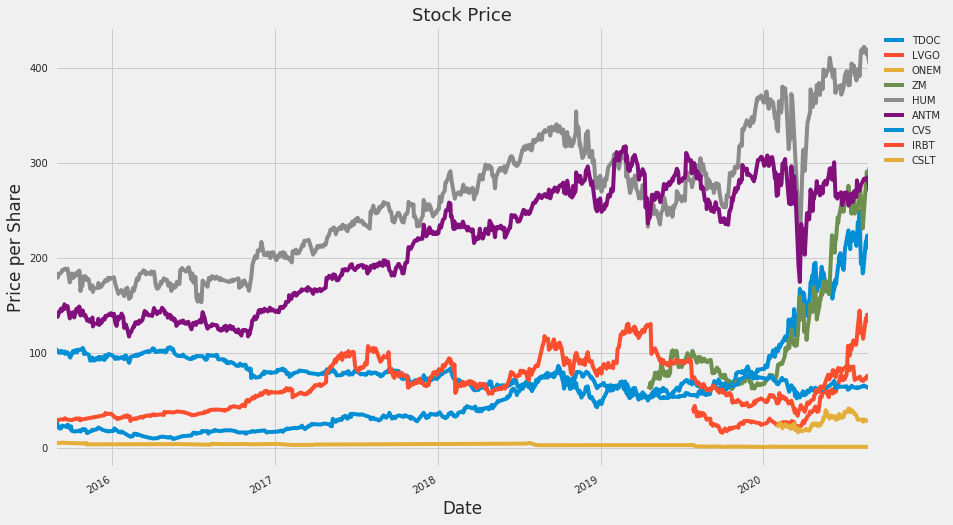

In [189]:
# Plot line plot of prices for each stock
stock_prices.plot(figsize=(13,9))
plt.ylabel('Price per Share')
plt.title('Stock Price', fontsize=18)

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper right', ncol=1)

### Normalized Component Prices

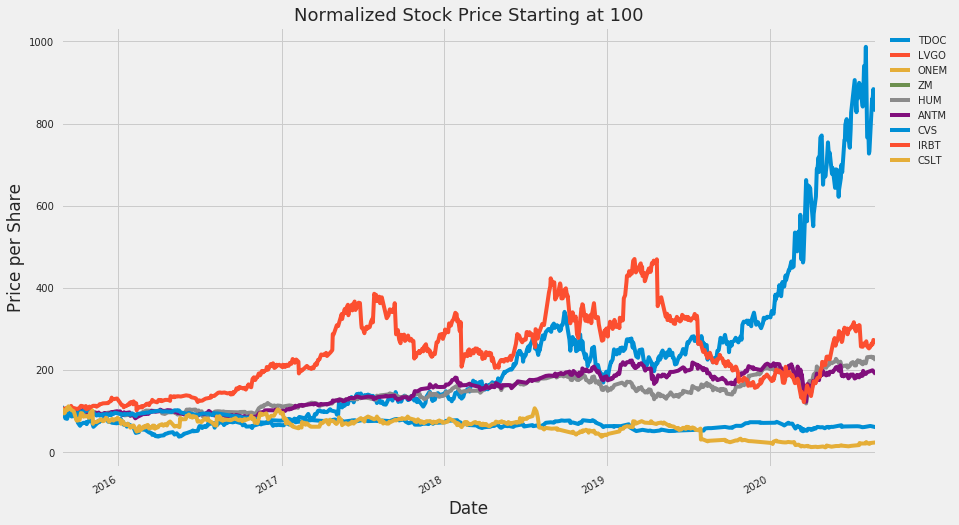

In [190]:
# Calculate normalized prices by dividing each price by the first price and multiplying by 100 to get starting point of 100
first_prices = stock_prices.iloc[0]
normalized = stock_prices.div(first_prices).mul(100)

# Plot line plot of normalized prices
normalized.plot(figsize=(13,9))
plt.ylabel('Price per Share')
plt.title('Normalized Stock Price Starting at 100', fontsize=18)

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)

### Component Returns

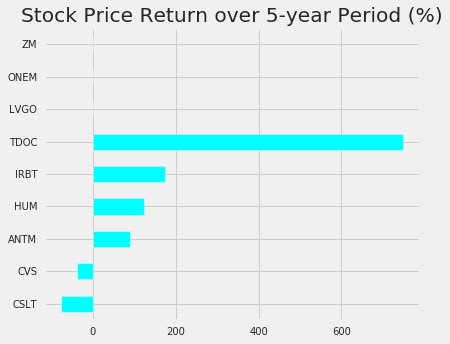

In [191]:
# Calculate total percent return over 5-year period (from first price to last price)
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Horizontal bar plot of % return over 5-year period (ZM, ONEM, LVGO went public in 2019 and 2020 so don't show up)
price_return.sort_values().plot(kind='barh', title='Stock Price Return over 5-year Period (%)', figsize=(6,5), color='cyan')

### Distribution of Component Returns

The daily return distributions are normal for all components, centering around 0 with a tigher distribution for established companies like HUM, ANTM, CVS and a wider distribution for TDOC, ONEM, LVGO, CSLT, IRBT, and ZM. 

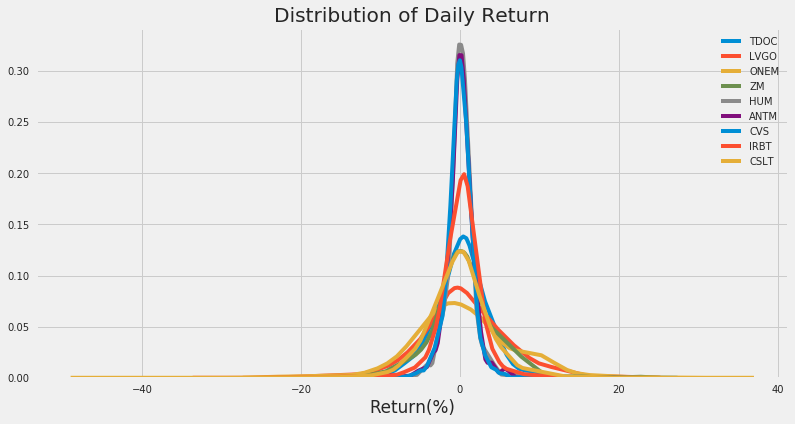

In [192]:
# Dataframe with calculation of daily return for each stock 
daily_return = stock_prices.pct_change().mul(100)


# Plot distribution of daily return
plt.figure(figsize=(12,6))
for column in daily_return.columns:
    sns.distplot(daily_return[column], hist=False, label=column)
    
plt.title('Distribution of Daily Return')
plt.xlabel('Return(%)')
plt.show()

As expected, the picture is more telling when looking at monthly return distributions. Centers vary more. Additionally, the standard deviation is clearly higher for  TDOC, ONEM, LVGO, CSLT, IRBT, and ZM relative to HUM, ANTM, and CVS. Companies like CSLT, ONEM, and ZM have particularly wide, non-normal distributions. 

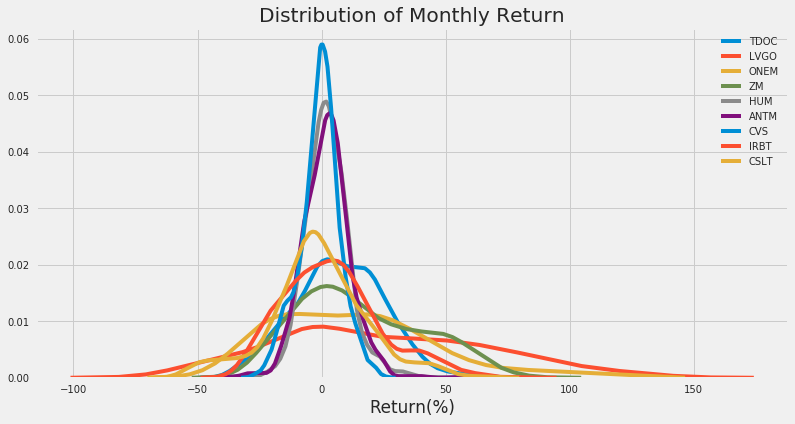

In [193]:
# Dataframe with calculation of monthly return for each stock 
monthly_return = stock_prices.pct_change(30).mul(100)

plt.figure(figsize=(12,6))
for column in monthly_return.columns:
    sns.distplot(monthly_return[column], hist=False, label=column)
    
plt.title('Distribution of Monthly Return')
plt.xlabel('Return(%)')
plt.show()

### Component Cumulative Return on 1000 Dollar Initial Investment

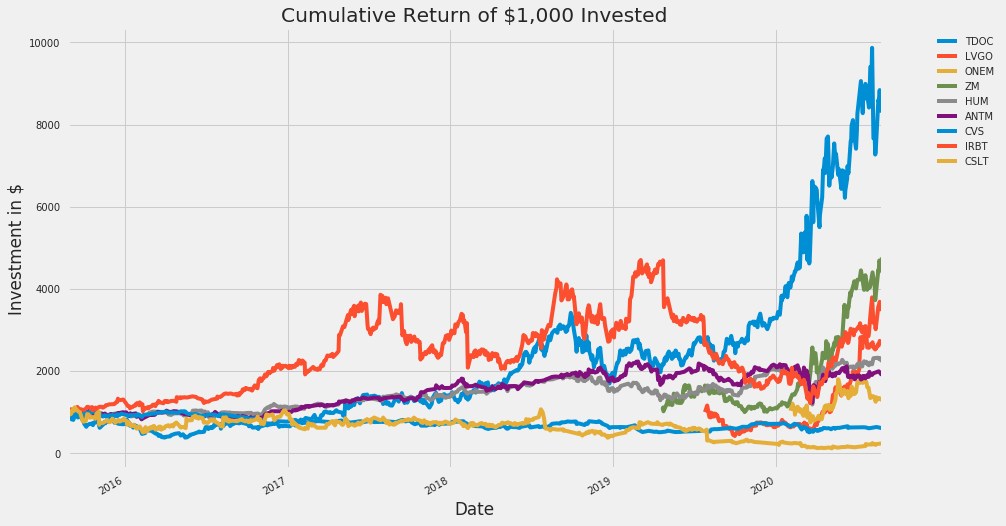

In [150]:
# Initial investment of $1,000
investment = 1000

# Daily returns
returns = stock_prices.pct_change()

# Calculate cumulative return by taking daily return, adding 1 using .add(1), and muliplying by previous stock price using cumprod()
return_plus_one = returns.add(1)
cumulative_return = return_plus_one.cumprod()

# Plot cumulative return of $1,000 invested by multiplying cumulative return by initial investment of $1,000 for each stock
cumulative_return.mul(investment).plot(title='Cumulative Return of $1,000 Invested', figsize=(13,9))

# Y axis label
plt.ylabel('Investment in $')

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1)

### Component Cumulative Rolling Annual Return 

In [151]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Daily returns
returns = stock_prices.pct_change()

# Calculate rolling_annual_returns, period is 360 days ('360D')
rolling_annual_returns = returns.rolling('360D').apply(multi_period_return)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


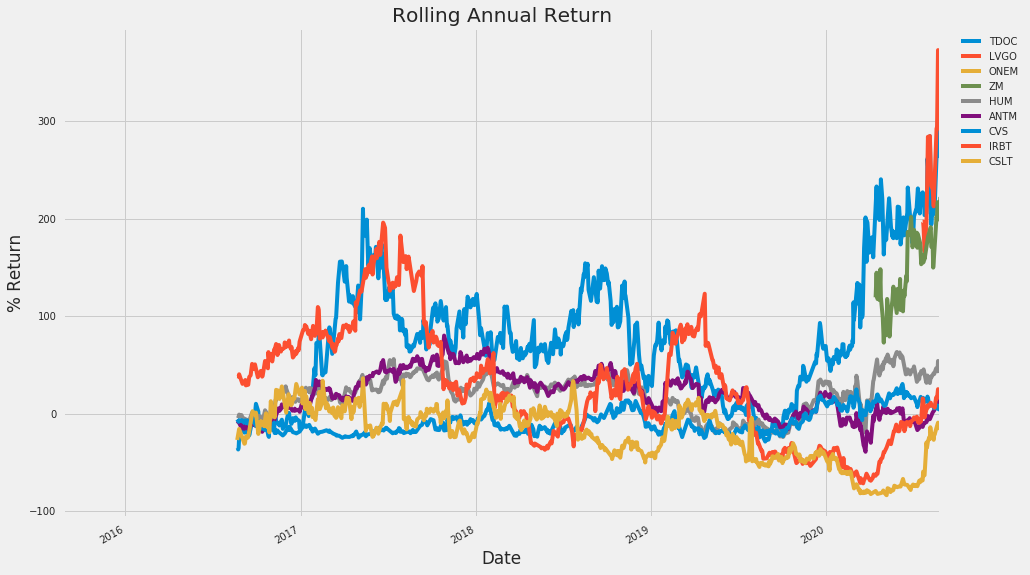

In [152]:
# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot(title='Rolling Annual Return', figsize=(14,10))

plt.ylabel('% Return')

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper right', ncol=1)

## 6. Construct Telehealth Index (Value-Weighted)

In [153]:
# Calculate market capitalization of each company by multipying closing price by volume (number of shares)
teladoc['Market Cap'] = teladoc['Close'].mul(teladoc['Volume']).div(1e6)
livongo['Market Cap'] = livongo['Close'].mul(medtronic['Volume']).div(1e6)
onemedical['Market Cap'] = onemedical['Close'].mul(medtronic['Volume']).div(1e6)
zoom['Market Cap'] = zoom['Close'].mul(zoom['Volume']).div(1e6)
humana['Market Cap'] = humana['Close'].mul(humana['Volume']).div(1e6)
anthem['Market Cap'] = anthem['Close'].mul(anthem['Volume']).div(1e6)
cvs['Market Cap'] = cvs['Close'].mul(teladoc['Volume']).div(1e6)
irobot['Market Cap'] = irobot['Close'].mul(irobot['Volume']).div(1e6)
castlight['Market Cap'] = castlight['Close'].mul(castlight['Volume']).div(1e6)

In [154]:
# Let's look at only market cap by dropping other columns for each company
teladoc_market_cap = teladoc.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
livongo_market_cap = livongo.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
onemedical_market_cap = onemedical.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
zoom_market_cap = zoom.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
humana_market_cap = humana.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
anthem_market_cap = anthem.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
cvs_market_cap = cvs.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
irobot_market_cap = irobot.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)
castlight_market_cap = castlight.drop(['High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [155]:
# Rename 'Market Cap' column in each price dataframe to ticker symbol
teladoc_market_cap.rename(columns={"Market Cap":"TDOC"}, inplace=True)
livongo_market_cap.rename(columns={"Market Cap":"LVGO"}, inplace=True)
onemedical_market_cap.rename(columns={"Market Cap":"ONEM"}, inplace=True)
zoom_market_cap.rename(columns={"Market Cap":"ZM"}, inplace=True)
humana_market_cap.rename(columns={"Market Cap":"HUM"}, inplace=True)
anthem_market_cap.rename(columns={"Market Cap":"ANTM"}, inplace=True)
cvs_market_cap.rename(columns={"Market Cap":"CVS"}, inplace=True)
irobot_market_cap.rename(columns={"Market Cap":"IRBT"}, inplace=True)
castlight_market_cap.rename(columns={"Market Cap":"CSLT"}, inplace=True)

In [156]:
# Join company dataframes into one for stock prices
market_cap = pd.concat([teladoc_market_cap, livongo_market_cap, onemedical_market_cap, zoom_market_cap, humana_market_cap, anthem_market_cap, cvs_market_cap, irobot_market_cap, castlight_market_cap], axis=1)

# Check first few rows
market_cap.head()

,TDOC,LVGO,ONEM,ZM,HUM,ANTM,CVS,IRBT,CSLT
Date,,,,,,,,,
2015-08-26,37.411873,NaN,NaN,NaN,250.058022,370.483186,152.237317,15.192603,4.969616
2015-08-27,41.724383,NaN,NaN,NaN,190.465183,323.271848,167.983355,12.371712,3.668882
2015-08-28,18.361728,NaN,NaN,NaN,93.182661,283.720355,69.008832,9.147267,4.172300
2015-08-31,14.517360,NaN,NaN,NaN,168.367863,455.379935,57.753601,7.497870,2.533910
2015-09-01,38.541096,NaN,NaN,NaN,184.053900,461.520766,169.125403,11.719908,2.868030


### Market Cap Change by Component

Text(0.5, 0, 'Market Cap ($ Millions)')

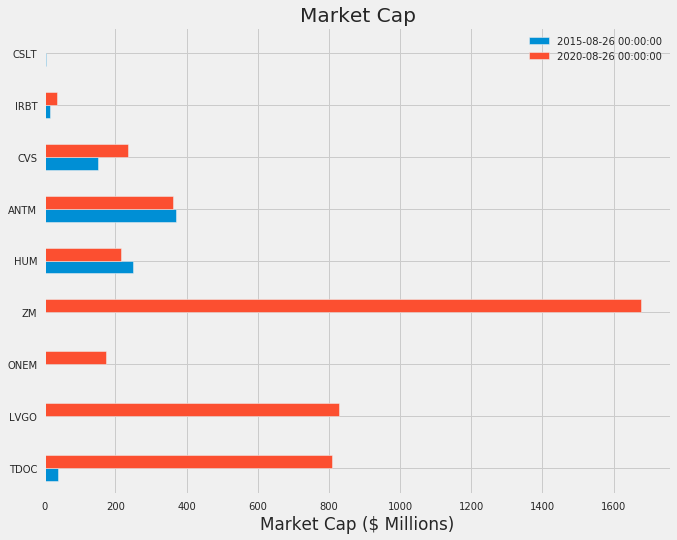

In [157]:
# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh', figsize=(10,8), title='Market Cap')
plt.xlabel('Market Cap ($ Millions)')

### Index Market Cap

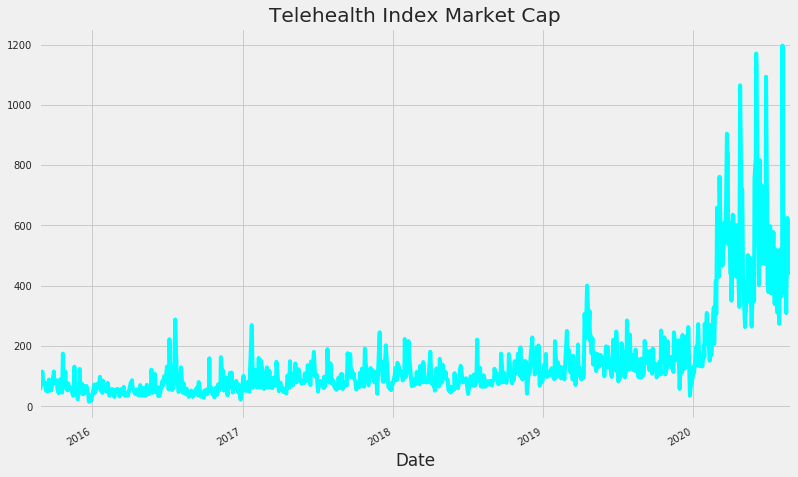

In [158]:
# To get the market cap of the composite index per trading day, sum market cap of all the stocks
index_market_cap = market_cap.sum(axis=1)

# Normalize the index market cap here 
normalized_index = index_market_cap.div(index_market_cap.iloc[0]).mul(100)


# Plot index market cap normalized to starting point of 100
normalized_index.plot(title='Telehealth Index Market Cap', figsize=(12,8), color='cyan')

The index's increase in market cap over the 5-year period is 423%

In [159]:
# Calculate total index % return over 5-year period
index_return_total = ((index_market_cap.iloc[-1]/index_market_cap.iloc[0])-1) * (100)
index_return_total

422.66185398362603

The index added 3.5 billion dollars in market capitalization in the 5-year period.

In [160]:
# Calculate total market cap added by index over entire period
index_market_cap_added = index_market_cap.iloc[-1] - index_market_cap.iloc[0]
index_market_cap_added

3509.5837622512818

In [161]:
# Create dataframe of only the first and last calendar day ('D') using append, which concatenates vertically
change = market_cap.first('D').append(market_cap.last('D'))

# Calculate change in market cap over entire period 
change_market_cap = change.diff().iloc[-1]
change_market_cap.sort_values(ascending=False)

TDOC    771.838910
CVS      84.235736
IRBT     20.621261
CSLT     -4.580616
ANTM     -7.861377
HUM     -34.062466
LVGO           NaN
ONEM           NaN
ZM             NaN
Name: 2020-08-26 00:00:00, dtype: float64

### Component Current Weights

Calculating the current weights based on the most recent market capitalization, we see that ZM, LVGO, and TDOC make up the bulk of the index with weights 39%, 19%, and 19%, respectively

In [162]:
# Calculate current weight of each stock of total index market cap by dividing each stock's current market cap by the index's total cureent market cap
weights_current = market_cap.iloc[-1].div(market_cap.iloc[-1].sum())
weights_current.mul(100).sort_values(ascending=False)

ZM      38.632630
LVGO    19.081383
TDOC    18.646605
ANTM     8.355464
CVS      5.448768
HUM      4.976929
ONEM     4.024042
IRBT     0.825216
CSLT     0.008963
Name: 2020-08-26 00:00:00, dtype: float64

### Calculate Index Prices

In [163]:
# Let's isolate volume by dropping other columns for each company
teladoc_volume = teladoc.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
livongo_volume = livongo.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
onemedical_volume = onemedical.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
zoom_volume = zoom.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
humana_volume = humana.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
anthem_volume = anthem.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
cvs_volume = cvs.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
irobot_volume = irobot.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)
castlight_volume = castlight.drop(['High','Low','Open','Close','Adj Close', 'Market Cap'], axis=1)

In [164]:
# Rename 'Volume' column in each price dataframe to ticker symbol
teladoc_volume.rename(columns={"Volume":"TDOC"}, inplace=True)
livongo_volume.rename(columns={"Volume":"LVGO"}, inplace=True)
onemedical_volume.rename(columns={"Volume":"ONEM"}, inplace=True)
zoom_volume.rename(columns={"Volume":"ZM"}, inplace=True)
humana_volume.rename(columns={"Volume":"HUM"}, inplace=True)
anthem_volume.rename(columns={"Volume":"ANTM"}, inplace=True)
cvs_volume.rename(columns={"Volume":"CVS"}, inplace=True)
irobot_volume.rename(columns={"Volume":"IRBT"}, inplace=True)
castlight_volume.rename(columns={"Volume":"CSLT"}, inplace=True)

In [165]:
# Join company dataframes into one for stock volumes
stock_volumes = pd.concat([teladoc_volume, livongo_volume, onemedical_volume, zoom_volume, humana_volume, anthem_volume, cvs_volume, irobot_volume, castlight_volume], axis=1)

# Check first few rows
stock_volumes.head()

,TDOC,LVGO,ONEM,ZM,HUM,ANTM,CVS,IRBT,CSLT
Date,,,,,,,,,
2015-08-26,1479900,NaN,NaN,NaN,1383600.0,2606100.0,8957800.0,546300,948400
2015-08-27,1596800,NaN,NaN,NaN,1030600.0,2274000.0,6216200.0,434400,704200
2015-08-28,662400,NaN,NaN,NaN,506400.0,2018500.0,5082700.0,312300,758600
2015-08-31,564000,NaN,NaN,NaN,921100.0,3228500.0,5010200.0,255900,479000
2015-09-01,1686700,NaN,NaN,NaN,1026800.0,3342900.0,6787400.0,406800,579400


In [166]:
# To get the volume of the composite index per trading day, sum volume of all the stocks
index_volume = stock_volumes.sum(axis=1)

# Convert index_volume series to dataframe
index_volume = pd.DataFrame(index_volume)
index_volume.head(3)

,0
Date,
2015-08-26,15922100.0
2015-08-27,12256200.0
2015-08-28,9340900.0


In [167]:
# Rename '0' column to 'Volume'
index_volume.rename(columns={0:"Volume"}, inplace=True)
index_volume.head(3)

,Volume
Date,
2015-08-26,15922100.0
2015-08-27,12256200.0
2015-08-28,9340900.0


In [168]:
# Convert index_market_cap series to dataframe
index_market_cap = pd.DataFrame(index_market_cap)
index_market_cap.head(3)

,0
Date,
2015-08-26,830.352616
2015-08-27,739.485363
2015-08-28,477.593143


In [169]:
# Rename '0' column to 'Index'
index_market_cap.rename(columns={0:"Market Cap"}, inplace=True)
index_market_cap.head(3)

,Market Cap
Date,
2015-08-26,830.352616
2015-08-27,739.485363
2015-08-28,477.593143


In [170]:
# We divided market cap by 1e6 to express in millions earlier, let's multiply by 1e6 to obtain actual market cap
index_market_cap = index_market_cap.mul(1e6)
index_market_cap.head(3)

,Market Cap
Date,
2015-08-26,8.303526e+08
2015-08-27,7.394854e+08
2015-08-28,4.775931e+08


In [171]:
# Join dataframes
index_price = pd.concat([index_market_cap, index_volume], axis=1)
index_price.head()

,Market Cap,Volume
Date,,
2015-08-26,8.303526e+08,15922100.0
2015-08-27,7.394854e+08,12256200.0
2015-08-28,4.775931e+08,9340900.0
2015-08-31,7.060505e+08,10458700.0
2015-09-01,8.678291e+08,13830000.0


In [172]:
# Calculate index price by multipying market cap by volume (number of outstanding shares shares)
index_price['Price'] = index_price['Market Cap'].div(index_price['Volume'])

# Check first 3 and last 3 rows
pd.concat([index_price.head(3), index_price.tail(3)])

,Market Cap,Volume,Price
Date,,,
2015-08-26,8.303526e+08,15922100.0,52.150948
2015-08-27,7.394854e+08,12256200.0,60.335615
2015-08-28,4.775931e+08,9340900.0,51.129243
2020-08-24,4.714918e+09,28713500.0,164.205630
2020-08-25,4.199621e+09,19789300.0,212.216751
2020-08-26,4.339936e+09,24805200.0,174.960749


In [173]:
# Keep only price column
index_price = index_price.drop(['Market Cap','Volume'], axis=1)

# Rename 'Price' column to 'Index'
index_price.rename(columns={"Price":"Index"}, inplace=True)

# Check first few rows
index_price.head()

,Index
Date,
2015-08-26,52.150948
2015-08-27,60.335615
2015-08-28,51.129243
2015-08-31,67.508442
2015-09-01,62.749754


## 7. Benchmark Telehealth Index Against S&P500

In [174]:
# S&P500 data from Yahoo Finance as dataframe
sp500 = pdr.get_data_yahoo("^GSPC", start="2015-08-26", end="2020-08-26")

# Check first 3 and last 3 rows
pd.concat([sp500.head(3), sp500.tail(3)])

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-26,1943.089966,1872.750000,1872.750000,1940.510010,5338250000,1940.510010
2015-08-27,1989.599976,1942.770020,1942.770020,1987.660034,5006390000,1987.660034
2015-08-28,1993.479980,1975.189941,1986.060059,1988.869995,3949080000,1988.869995
2020-08-24,3432.090088,3413.129883,3418.090088,3431.280029,3728690000,3431.280029
2020-08-25,3444.209961,3425.840088,3435.949951,3443.620117,3619300000,3443.620117
2020-08-26,3481.070068,3444.149902,3449.969971,3478.729980,3754360000,3478.729980


In [175]:
# Let's look at only S&P500 price ('Close' column) by dropping other columns
sp500_price = sp500.drop(['High','Low','Open','Volume','Adj Close'], axis=1)

# Rename 'Close' column to S&P500
sp500_price.rename(columns={"Close":"S&P500"}, inplace=True)

# Join dataframes
index_vs_sp500 = pd.concat([index_price, sp500_price], axis=1)

# Check first 3 and last 3 rows
pd.concat([index_vs_sp500.head(3), index_vs_sp500.tail(3)])

,Index,S&P500
Date,,
2015-08-26,52.150948,1940.510010
2015-08-27,60.335615,1987.660034
2015-08-28,51.129243,1988.869995
2020-08-24,164.205630,3431.280029
2020-08-25,212.216751,3443.620117
2020-08-26,174.960749,3478.729980


### Normalized Index Price

In [176]:
# Calculate normalized prices by dividing each price by the first price and multiplying by 100 to get starting point of 100
index_sp500_first_price = index_vs_sp500.iloc[0]
normalized_index_vs_sp500 = index_vs_sp500.div(index_sp500_first_price).mul(100)

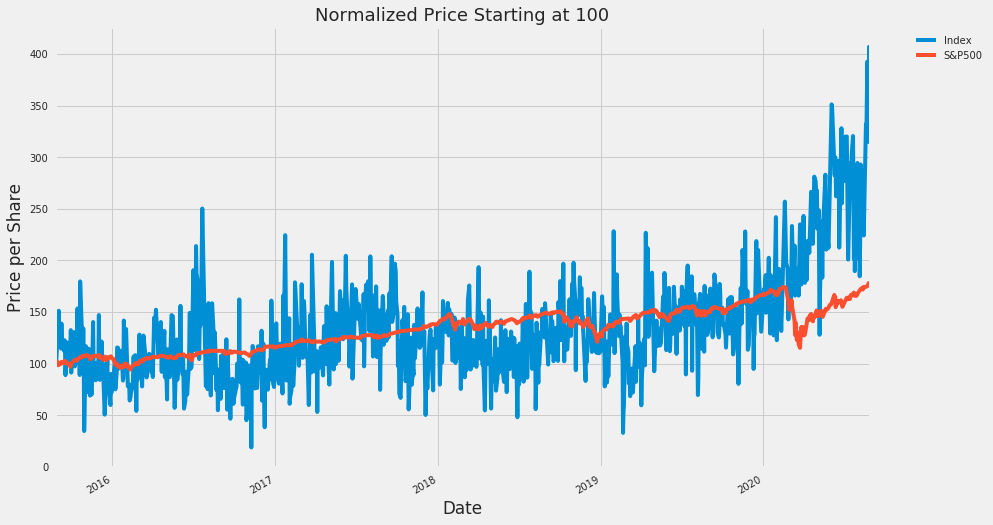

In [177]:
# Plot line plot of normalized prices
normalized_index_vs_sp500.plot(figsize=(13,9))
plt.ylabel('Price per Share')
plt.title('Normalized Price Starting at 100', fontsize=18)

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1)

### Distribution of Returns

As expected based ont the volatility of the index above, the montly return distribution for the S&P500 is much tighter (with a center slightly above 0) than that of the index.

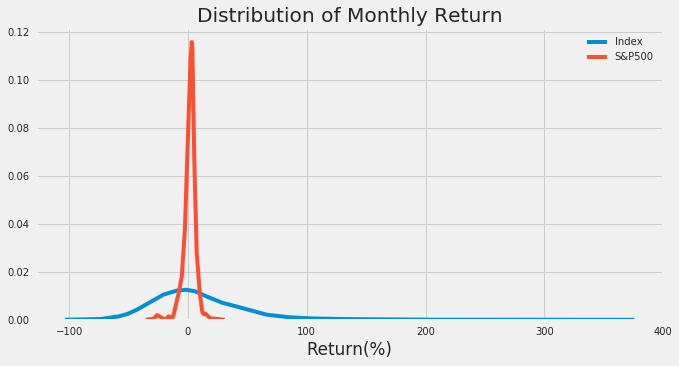

In [178]:
# Dataframe with calculation of monthly return for each stock 
index_sp500_monthly_return = index_vs_sp500.pct_change(30).mul(100)

plt.figure(figsize=(10,5))
for column in index_sp500_monthly_return.columns:
    sns.distplot(index_sp500_monthly_return[column], hist=False, label=column)
    
plt.title('Distribution of Monthly Return')
plt.xlabel('Return(%)')
plt.show()

### Index Cumulative Return on 1,000 Dollar Initial Investment

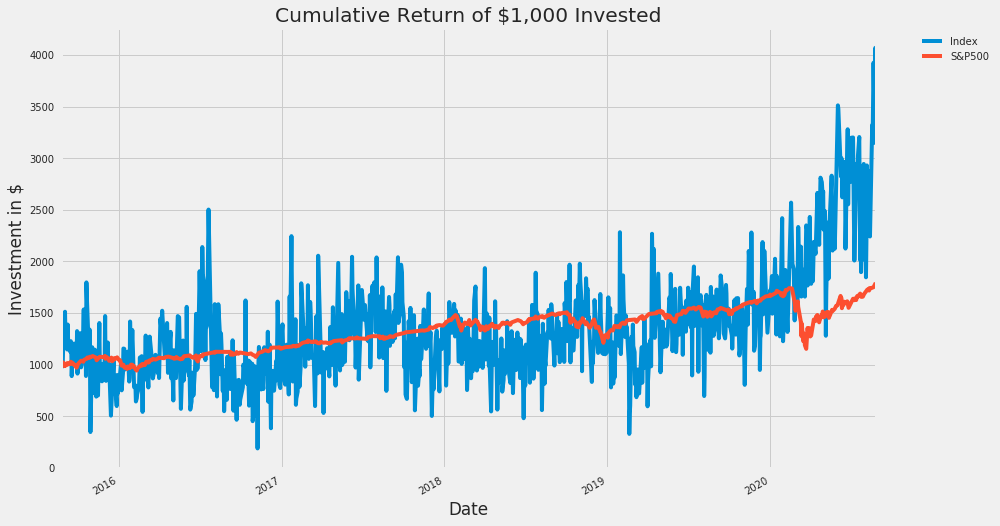

In [179]:
# Initial investment of $1,000
investment = 1000

# Daily returns
index_sp500_returns = index_vs_sp500.pct_change()

# Calculate cumulative return by taking daily return, adding 1 using .add(1), and muliplying by previous stock price using cumprod()
index_sp500_return_plus_one = index_sp500_returns.add(1)
index_sp500_cumulative_return = index_sp500_return_plus_one.cumprod()


# Plot cumulative return of $1,000 invested by multiplying cumulative return by initial investment of $1,000
index_sp500_cumulative_return.mul(investment).plot(title='Cumulative Return of $1,000 Invested', figsize=(13,9))

# Y-axis label
plt.ylabel('Investment in $')

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1)

### Index vs S&P500 Rolling Annual Return

In [180]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Daily returns
index_sp500_returns = index_vs_sp500.pct_change()

# Calculate rolling_annual_returns
index_sp500_rolling_annual_returns = index_sp500_returns.rolling('360D').apply(multi_period_return)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


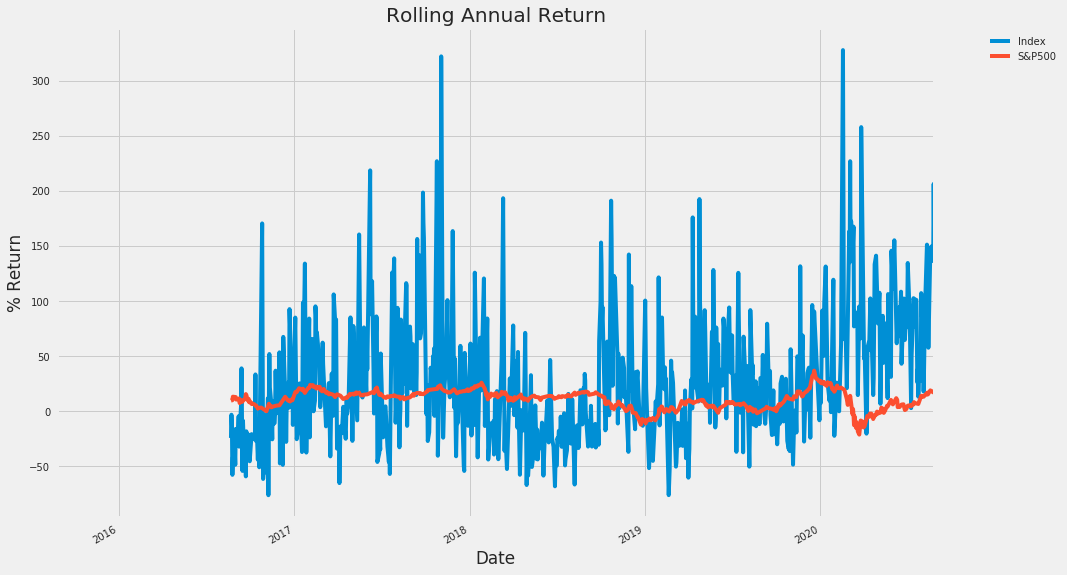

In [181]:
# Plot rolling_annual_returns
index_sp500_rolling_annual_returns.mul(100).plot(title='Rolling Annual Return', figsize=(14,10))

plt.ylabel('% Return')

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1)

Over the entire period, the index generated a return of 235%, roughly 3x that of the S&P500's return of 79% return.

In [182]:
# % return of index and S&P500 over entire 5-year period
index_vs_sp500.iloc[-1].div(index_vs_sp500.iloc[0]).sub(1).mul(100)

Index     235.489103
S&P500     79.268850
dtype: float64

In 2020 alone, the index generated a return of 95% compared to the S&P500's return of 7%.

In [183]:
# % return of index and S&P500 only in 2020 (since first trading day) 
index_vs_sp500.iloc[-1].div(index_vs_sp500.loc['2020-01-02']).sub(1).mul(100)

Index     94.921610
S&P500     6.779928
dtype: float64

### Volatility

Looking at the statistical summary, while the index featured a mean daily return of 3%, far higher than the S&P500's 0.05%, its day-to-day volatility, measured by standard deviation, was also far higher at 28%, compared to the S&P500's 1%. 

In [184]:
# Statistical summary
index_sp500_returns.describe()

,Index,S&P500
count,1259.000000,1259.000000
mean,0.034331,0.000537
std,0.279199,0.012066
min,-0.785961,-0.119841
25%,-0.126957,-0.002918
50%,0.007945,0.000676
75%,0.157174,0.005123
max,3.613114,0.093828


The box plot below illustrates the wider spread and prevalence of higher-end outliers for the index relative to the far more diversified S&P500. 

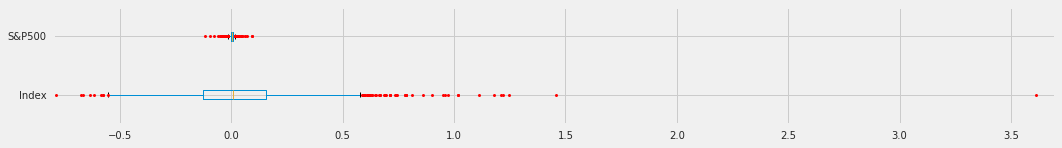

In [185]:
# Box plot of S&P500 and Index returns
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
index_sp500_returns.plot(kind='box', xlim=(-.8, 3.7), vert=False, flierprops=red_square, figsize=(16,2))

The line plot below reveals the index features a rolling annual standard deviation roughly 20x that of the S&P500.

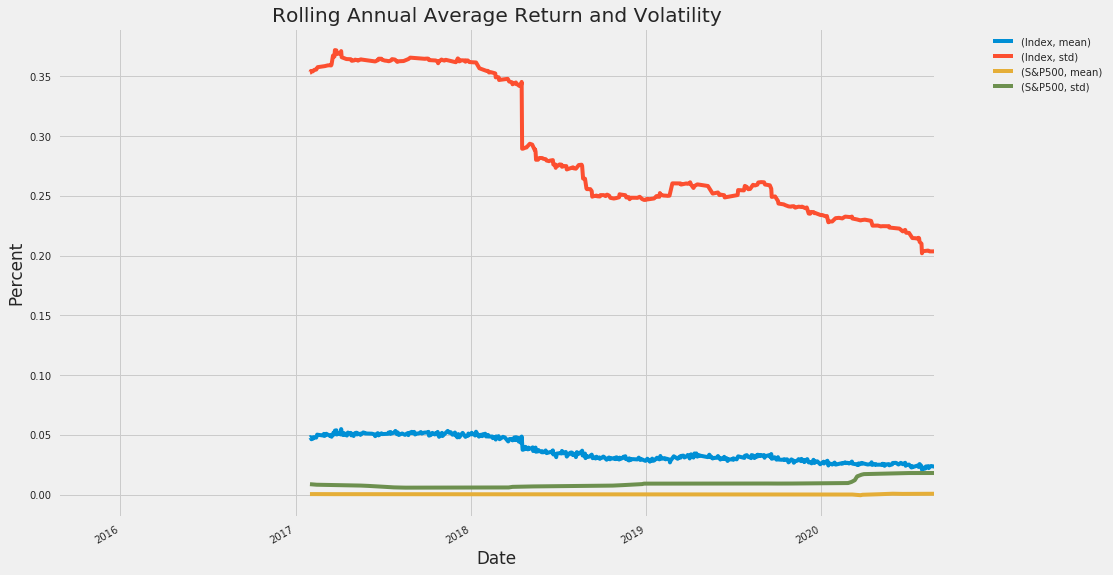

In [186]:
# Calculate the rolling mean and std using .agg function
rolling_stats = index_sp500_returns.rolling(360).agg(['mean','std'])

# Plot rolling average return and std of return
rolling_stats.plot(title='Rolling Annual Average Return and Volatility', figsize=(14,10))

plt.ylabel('Percent')

# Move legend outside so it doesn't cover plot
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', ncol=1)

## 8. Index Correlations

A well diversified index minimizes component correlation. Notably high correlations include those between HUM and ANTM, CVS and HUM, CVS and ANTM, TDOC and ZM, and LVGO and CVS.   

Text(0.5, 1.0, 'Daily Return Correlations')

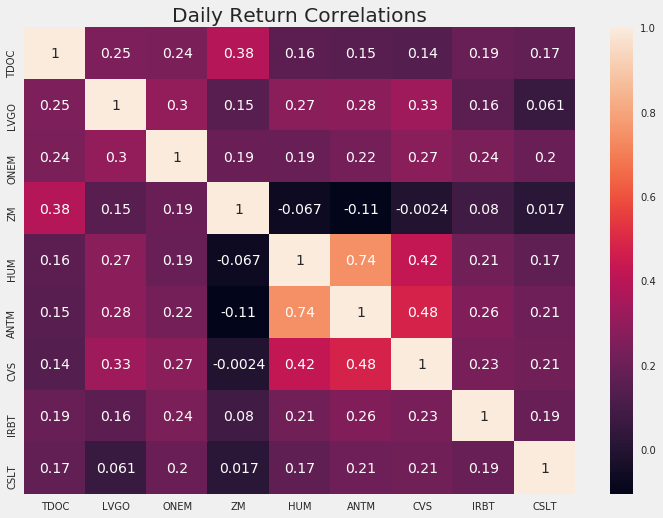

In [187]:
# Calculate Pearson correlation of daily returns between component stocks
correlations = returns.corr()

# Plot heatmap of correlations
plt.figure(figsize=(11,8))
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')

## 9. Export to Excel

Let's say your colleague or manager works with Excel. It would be great to provide them an excel file with our index data. Let's export to excel using pd.ExcelWriter.

In [194]:
# Create one dataframe with index prices and component stock prices
data = stock_prices.join(index_price)

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel using 
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='price')
    returns.to_excel(writer, sheet_name='returns')

## 10. Future Areas for Analysis

Future areas for analysis include valuation based on underlying fundamentals (e.g., earnings, cash flow), managmenent, technology, and business model assessment, market value ratios, and portfolio risk. Additionally, since the above index's day-to-day volatility and index correlations would be hard to stomach for most casual investors, it would be good to diversify the index with additional pure-play, diversified medical technology / device (e.g., Medtronic), insurance and payments, healthcare cloud / information systems, and big tech (e.g., Apple) companies.   